# Вычисление параметров молекулы водорода

In [3]:
import hfscf
from hfscf import *

In [4]:
import sympy

В этом практикуме мы должны, используя метод Хартри-Фока и зная расстояние между ядрами в молекуле водорода, расчитать молекулярные орбитали и энергию электронной подсистемы, а также полную энергию молекулы. Вычисление молекулярных орбиталей и их энергий будем проводить по алгоритму, который основан на идее самосогласованного поля: молекулярные орбитали подбираются так, чтобы создаваемое электронами электростатическое поле было согласовано с самими этими орбиталями, которые получаются из него с помощью уравнения Хартри-Фока.

In [35]:
def SCF (r = 1.4632, Z=[1,1], b1 = GTO["H"], b2 = GTO["H"], b = 6, vbs=True):
    #На вход задаём расстояние между ядрами, заряды ядер и базисные наборы гауссиан для аппроксимации ими волновых
    #функций. Будем использовать по шесть гауссиан для каждого из двух атомов водорода
    R = [0, r]
    if vbs: print("*) Generando matriz de traslape S.")
    s_scf = S(R,b1,b2,b)
    #расчитываем интеграл перекрывания
    if vbs: print("\n*) Generando hamiltoniano H.")
    h_scf = H(R,Z,b1,b1,b)
    #расчитываем одноэлектронный гамильтониан, включающий кинетическую энергию электрона
    #и энергию его притяжения к ядрам
        
    # Diagonalizar matriz S y hallar matriz X
    if vbs: print("\n*) Diagonalizando matriz S y hallando matriz diagonal X.")
    X = diagon(m=s_scf)
    Xa = X.getH()
    
    # Estimar matriz de densidad P
    #Расчитываем матрицу электронной плотности
    if vbs: print("\n*) Creando matriz de densidad P.")
    p_scf = np.matrix([[0,0],[0,0]], dtype=np.float64)  # Referencia (7) p. 148
    
    #Повторям вычисления до сходимости или до 50 интераций
    # Comenzar proceso iterativo
    if vbs: print("\n*) Comenzando con el SCF.")
    for iteracion in range(50):
        # Construir matriz de Fock F
        # F = H + G
        if vbs: print("\n**) Generando la matriz de Fock: calculando \
integrales de dos electrones.")
        g_scf = G(r,p_scf,b1,b2,b)
        f_scf = h_scf + g_scf   # Referencia (7) p. 141 eq. (3.154)
        #Конструируем фокиан из одноэлектронного гамильтониана и обменного и кулоновского операторов
        
        # Construir matriz F'
        # F' = X_adj * F * X
        if vbs: print("**) Cambiando la base de F.")
        f_tra = Xa * f_scf * X
        
        # Diagonalizar matriz F y constuir matriz C'
        if vbs: print("**) Diagonalizando F' y generando C'.")
        c_tra = diagon2(m=f_tra)
        
        # Construir matriz C
        # C = X * C'
        if vbs: print("**) Construyendo matriz de coeficientes C.")
        c_scf = X * c_tra
        #Расчитываем матрицу коэффициентов из уравения Хартри-Фока
        
        # Construir matriz P a partir de matriz C
        if vbs: print("**) Recalculando matriz de densidad P.")
        p_temp = P(C=c_scf)
        #Пересчитываем матрицу плотности, используя найденные коэффициенты
        
        print("\nConcluida la " + str(iteracion + 1) + ". iteracion.\n")
        
        # Revisar convergencia
        #Проверяем сходимость и выдаём результат
        if np.linalg.norm(p_temp - p_scf) < 1E-4: # Referencia (7) p. 148
            print("\n\n-->El campo autoconsistente SI ha convergido!")
            return {"S":s_scf,"H":h_scf,"X": X,"F":f_scf,"C":c_scf,"P":p_temp}
        else:
            p_scf = p_temp
    print("\n\n-->El campo autoconsistente NO ha convergido!\nRevisar supuestos.")
    return {"S":s_scf,"H":h_scf,"X": X,"F":f_scf,"C":c_scf,"P":p_temp}

В итоге после запуска функции мы получаем следующие матрицы: S - матрица перекрывания атомных орбиталей, H - одноэлектронный гамильтониан, X - ортогонализированная матрица S, F - фокиан, P - матрица электронной плотсности, C - матрица коэффициентов

In [43]:
HF = SCF()

*) Generando matriz de traslape S.

*) Generando hamiltoniano H.

*) Diagonalizando matriz S y hallando matriz diagonal X.

*) Creando matriz de densidad P.

*) Comenzando con el SCF.

**) Generando la matriz de Fock: calculando integrales de dos electrones.
**) Cambiando la base de F.
**) Diagonalizando F' y generando C'.
**) Construyendo matriz de coeficientes C.
**) Recalculando matriz de densidad P.

Concluida la 1. iteracion.


**) Generando la matriz de Fock: calculando integrales de dos electrones.
**) Cambiando la base de F.
**) Diagonalizando F' y generando C'.
**) Construyendo matriz de coeficientes C.
**) Recalculando matriz de densidad P.

Concluida la 2. iteracion.


**) Generando la matriz de Fock: calculando integrales de dos electrones.
**) Cambiando la base de F.
**) Diagonalizando F' y generando C'.
**) Construyendo matriz de coeficientes C.
**) Recalculando matriz de densidad P.

Concluida la 3. iteracion.


**) Generando la matriz de Fock: calculando integrales de d

In [45]:
c = HF['C']
x = HF['X']
f = HF['F']
p = HF['P']
h = HF['H']

С помощью расчитанных матриц визуализируем молекулярные орбитали молекулы водорода и электронную плотность в 1D и 2D.

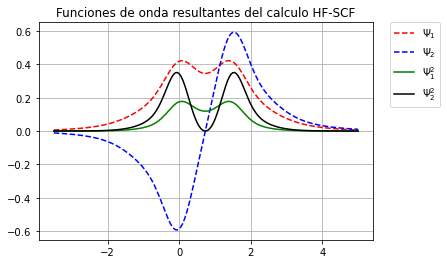

In [46]:
orbital(c)

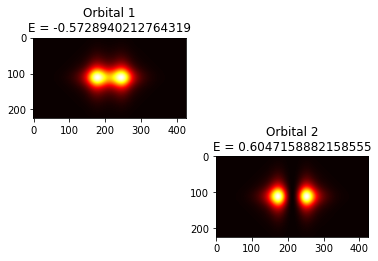

In [39]:
orbital2D(c,x,f)

Мы видим, что у нас есть две молекулярные орбитали - одна с положительной энергией - разрыхляющая, и одна с отрицательной - связывающая.

Энергия электронов (кинетическая + притяжение к ядрам + отталкивание):

In [47]:
ener_elec(p, h, f)

-1.8139359654437919

Полная энергия системы (энергия электронов + энергия межъядерного отталкивания):

In [41]:
ener_tot(elec=ener_elec(p,h,f))

-1.130502395186821